<a href="https://colab.research.google.com/github/nacamacho/MedicBot/blob/main/Med_360_an%C3%A1lisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***Med 360:*** *Análisis exploratorio de datos sobre la eficacia de los Chatbots en Entidades Médicas*⚕️🤖

#**0. Limpieza de los datos**

Se debe haber llevado a cabo la limpieza del set de datos, realizada en el tutorial anterior.

Enlaces:
- [Notebook](https://colab.research.google.com/drive/1hluuBh9ifapzSq42HlYrPB0Snsi7b_Ro#scrollTo=s90V96SlBOL0)
- [Video en YouTube](https://youtu.be/bGnD1Ki7j-g)

#**1. El problema**

En la actualidad, los chatbots ofrecidos por las Entidades Promotoras de Salud (EPS) del país están enfrentando dificultades significativas en la satisfacción del usuario debido a las quejas recurrentes sobre la calidad de las interacciones y respuestas proporcionadas por esta herramienta. La insatisfacción generalizada de los usuarios resalta la necesidad urgente de mejorar la experiencia de usuario con este tipo de tecnología en el ámbito de la atención de la salud.

Nuestro objetivo principal es abordar estas preocupaciones y mejorar la experiencia del usuario con los chatbots de las EPS. Para lograr esto, nos enfocaremos en recolectar información detallada sobre las respuestas generadas por los chatbots y en introducir nuevas interacciones que optimicen la experiencia del usuario.

¿Qué perfil tienen los usuarios con mayores dificultades en la interacción con el chatbot de su EPS?

#2. El set de datos después de la limpieza

La información recolectada por el quipo de mercadeo se encuentra en un archivo CSV () con 30 filas y 15 columnas.

Cada registro contiene 13 características y una categoría ("si" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "Marca Temporal": Fecha y hora (duración)
2. "Nombre": Nombre (nominal)
2. "Ciudad": Lugar de residencia (categórica: "Bogotá", "Ibagué", "Medellin", "Cali", "Barranquilla", "Cartagena", "Bucaramanga", "Cúcuta","Santa Marta", "Pereira", "Manizales", "Villavicencio", "Pasto", "Neiva", "Montería", "Sincelejo", "Popayán", "Valledupar", "Armenia", "Tunja", "Ibague", "Riohacha", "Buenaventura", "Palmira", "Soledad", "Itagüí", "Floridablanca", "Girardot", "Fusagasugá", "Facativá", "Tuluá", "Envigado", "Yopal", "Barrancabermeja", "Cartago", "Quibdo", "Montería", "Leticia", "Florencia", "Puerto Asís", "Arauca", "Apartadó", "Puerto Tejada","Sogamoso", "Mosquera")
3. "Edad": Edad (Numérica)
4. "EPS": EPS pertenece (categórica: "Sanitas", "Sura", "Nueva eps", "Allianz", "Salud Total", "Compensar", "Famisanar", "Coosalud", "Coomeva", "Cruz blanca", "Cajacopi", "Capital salud", "Comfama", "Emsanar", "Mutual ser", "Savia salud", "Comfenalco", "Ambuq", "Suramericana")
5. "Aspectos a mejorar": (categórica: "Tiempo de respuesta", "Asignación de turnos", "Facilidad del interfaz")
6. "¿Ha utilizado el chatbot para agendar citas médicas?": ("Si", "no")
7. "Si ha utilizado un chatbot ¿Para qué lo ha utilizado principalmente?:(categórica:"programar una cita", "obtener información sobre una condición médica", "hacer preguntas sobre un medicamento, tratamiento y orden médica")
8. "¿Que tan satisfecho esta con la interfaz y la facilidad de uso del chatbot?": (categórica: "muy satisfecho", "más o menos satisfecho", "nada satisfecho")
9. "¿Considera que el chatbot es util para agendar citas médicas de manera eficiente?":(categórica: "Si", "tal vez", "no")
10. "¿Cada cuanto utiliza eel chatbot, para generar una cita médica?":(categórica: "una vez por semana", "una vez al año", "no lo utilizo para este fin")
11. "¿Ha experimentado algún problema o dificultad al interactual con el chatbot?":(categórica: "Si", "no")
12. "¿Que problemas ha experimentado": (categórica: "Limitaciones en la capacidad de respuesta en tiempo real", "Incapacidad para entender consultas complejas", "Interacciones impersonales y falta de empatía")
13. "¿Que tiempo tarde el chatbot en contestar la pregunta expuesta por usted?": (numerica)
14. "¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?": (categórica: "Si", "no")

#3. Lectura del dataset

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lectura
from google.colab import drive
drive.mount('/gdrive')

ruta = "/gdrive/MyDrive/Entrega_No.2_Big_Data/Encuesta_Med_360.csv"
data = pd.read_csv(ruta)

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
print(data.shape)
data.head()

(30, 15)


,Marca temporal,Nombre,Ciudad,Edad,Que EPS pertenece,¿Qué aspectos mejoraría de los chatbot?,"Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?",Ha utilizado el chatbot para agendar citas médicas,Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?,¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?,"¿Cada cuanto utiliza el chat bot, para generar una cita médica?",¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?,¿Qué problemas ha experimentado?,¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?,¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?
0,22/04/2024 2:57:24,Daniel Sanchez,ibague,22 a 30 años,sanitas,facilidad del interfaz,programar una cita,si,más o menos satisfecho,tal vez,una vez por semana,no,limitaciones en la capacidad de respuesta en t...,de 3 minutos a 5 minutos,si
1,22/04/2024 7:40:38,Juan angel,bogotá,22 a 30 años,sura,facilidad del interfaz,programar una cita,si,más o menos satisfecho,sí,una vez al año,si,incapacidad para entender consultas complejas:,de un 1 minuto a 3 minutos,si
2,22/04/2024 9:11:37,Carlos Daniel Sanchez Devia,bogota,18 a 21 años,sanitas,asignación de turnos,programar una cita,si,más o menos satisfecho,sí,una vez al año,si,incapacidad para entender consultas complejas:,de 3 minutos a 5 minutos,si
3,22/04/2024 12:41:01,Esteban sanchez,ibague,18 a 21 años,sanitas,tiempo de respuesta,obtener información sobre una condición médica,si,más o menos satisfecho,tal vez,una vez al año,si,limitaciones en la capacidad de respuesta en t...,de un 1 minuto a 3 minutos,no
4,22/04/2024 14:15:32,Yuneidis margarita teran ospino,bogota d.c,22 a 30 años,nueva eps,asignación de turnos,obtener información sobre una condición médica,no,muy satisfecho,sí,no lo utilizo para este fin,si,limitaciones en la capacidad de respuesta en t...,de un 1 minuto a 3 minutos,si


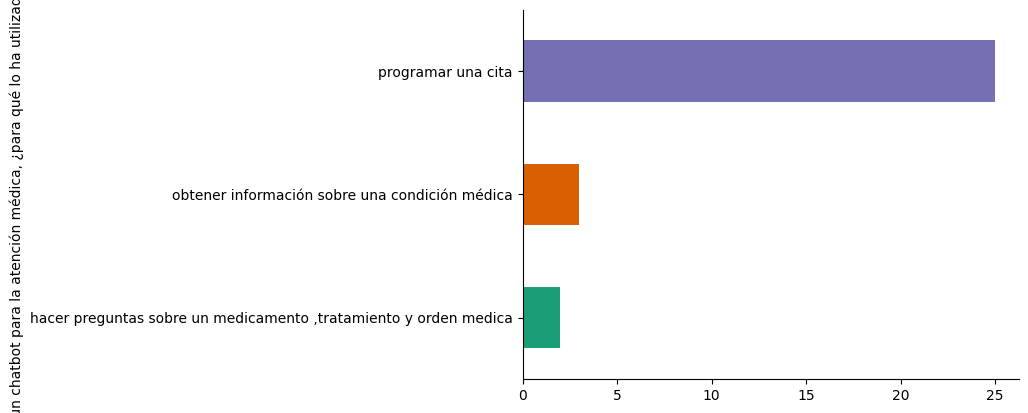

In [9]:
# @title Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

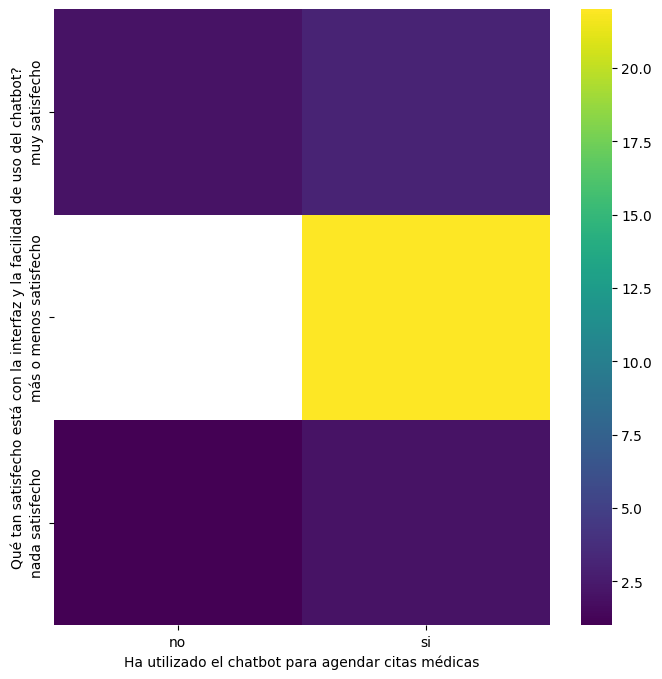

In [8]:
# @title Ha utilizado el chatbot para agendar citas médicas vs Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?'].value_counts()
    for x_label, grp in data.groupby('Ha utilizado el chatbot para agendar citas médicas')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Ha utilizado el chatbot para agendar citas médicas')
_ = plt.ylabel('Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?')

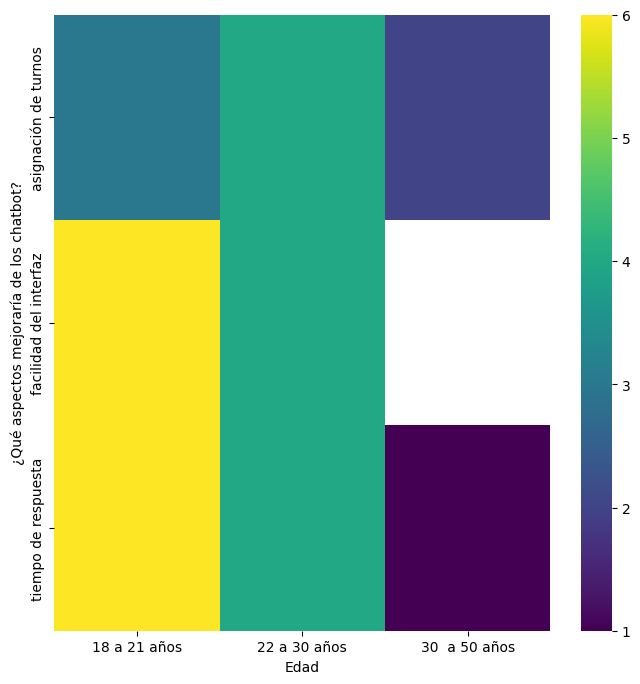

In [7]:
# @title Edad vs ¿Qué aspectos mejoraría de los chatbot?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['¿Qué aspectos mejoraría de los chatbot?'].value_counts()
    for x_label, grp in data.groupby('Edad')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Edad')
_ = plt.ylabel('¿Qué aspectos mejoraría de los chatbot?')

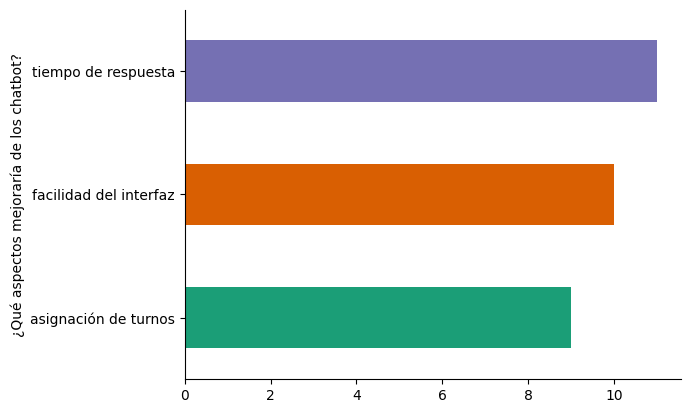

In [6]:
# @title ¿Qué aspectos mejoraría de los chatbot?

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('¿Qué aspectos mejoraría de los chatbot?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

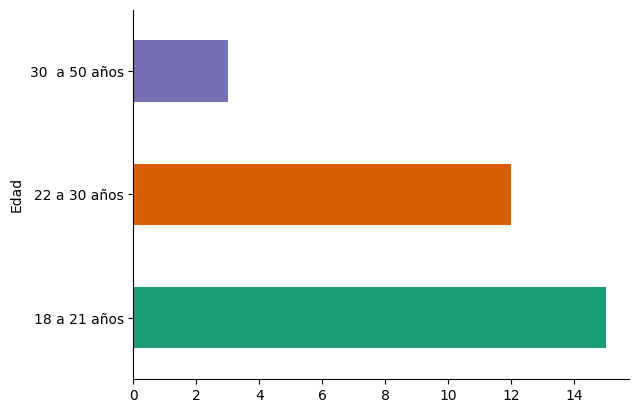

In [5]:
# @title Edad

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Edad').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

#4. Análisis exploratorio

La idea es usar herramientas estadísticas y de visualización para:

- Crear un mapa mental del set de datos (entenderlo)
- Empezar a encontrar respuestas a la pregunta planteada inicialmente (¿qué perfil tienen los clientes con mayor dificultad?)

Llevaremos a cabo estas fases:

1. Análisis de cada variable de manera individual
2. Análisis univariado: relación de cada variable predictora con la variable a predecir
3. Análisis bivariado: relación de pares de variables predictoras con la variable a predecir

##4.1 Análisis de cada variable de manera individual

Nos permite entender las características generales de cada variable de nuestro set de datos.

In [10]:
# Con data.info() podemos ver las variables categóricas
# (Dtype=object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 15 columns):
 #   Column                                                                                         Non-Null Count  Dtype 
---  ------                                                                                         --------------  ----- 
 0   Marca temporal                                                                                 30 non-null     object
 1   Nombre                                                                                         30 non-null     object
 2   Ciudad                                                                                         30 non-null     object
 3   Edad                                                                                           30 non-null     object
 4   Que EPS pertenece                                                                              30 non-null     object
 5   ¿Qué aspectos mejoraría de los 

<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)
<ipython-input-17-c306c58f8e56>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_

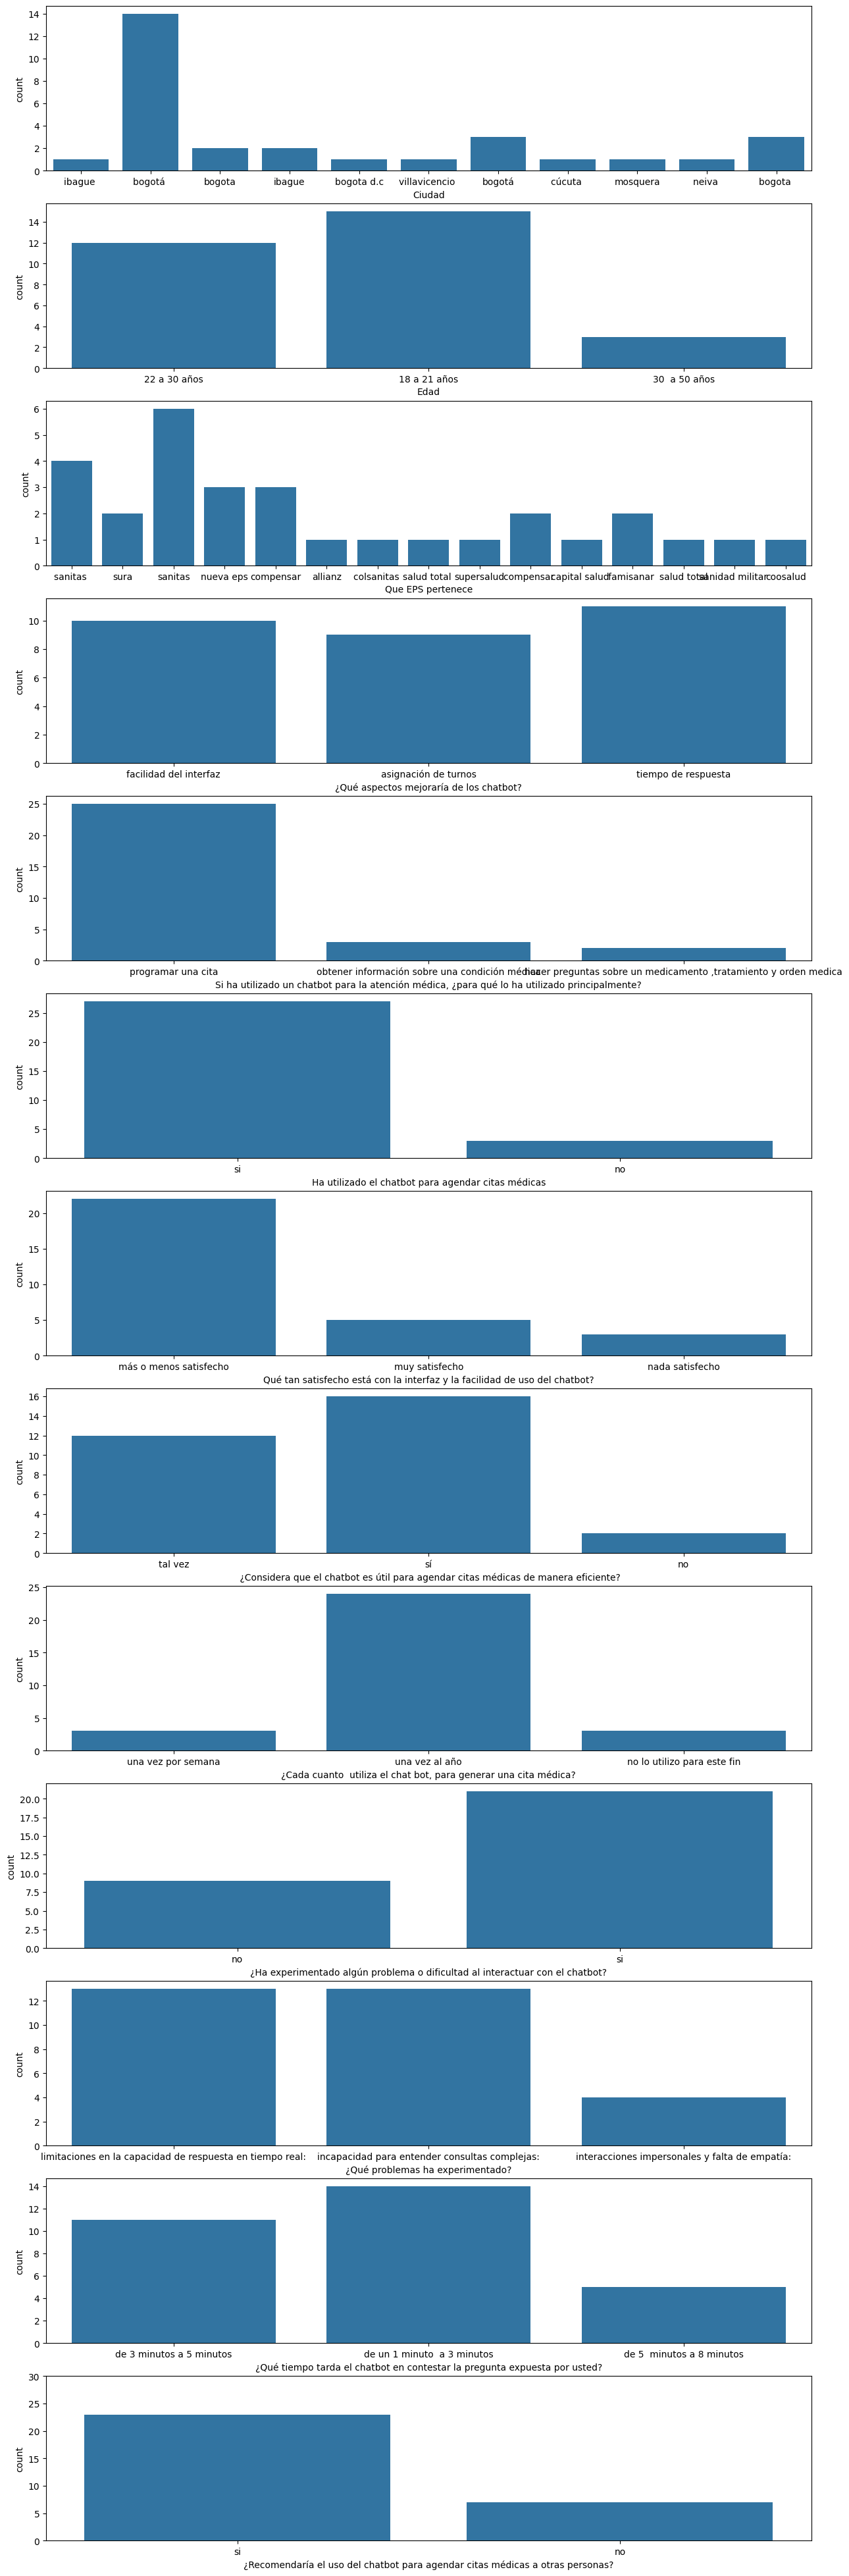

In [17]:
# Tomemos las variables categóricas y generemos gráficos de barras

col_cat = ['Ciudad','Edad','Que EPS pertenece' ,'¿Qué aspectos mejoraría de los chatbot?','Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?','Ha utilizado el chatbot para agendar citas médicas','Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?',' ¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?','¿Cada cuanto  utiliza el chat bot, para generar una cita médica?'
,'¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?','¿Qué problemas ha experimentado?','¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?','¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?']

# Gráficos de barras de conteo
fig, ax = plt.subplots(nrows=len(col_cat), figsize=(15,50))
plt.ylim(0,30)
fig.subplots_adjust(hspace=0.2)

for i, col in enumerate(col_cat):
  sns.countplot(x=col, data=data, ax=ax[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(),rotation=0)

**Observaciones:**

Niveles de cada variable de interés:

1. Ciudad: 11 subniveles
2. Edad: 3 subniveles
3. Que EPS pertenece: 16 subniveles
4. ¿Qué aspectos mejoraría de los chatbot?: 3 subniveles
5. Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?: 3 subniveles
6. Ha utilizado el chatbot para agendar citas médicas: 2 subniveles
7. Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?: 3 subniveles
8. ¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?: 3 subniveles
9. ¿Cada cuanto  utiliza el chat bot, para generar una cita médica?: 3 subniveles
10. ¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?: 2 subniveles
11. ¿Qué problemas ha experimentado?: 3 subniveles
12. ¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?: 3 subniveles
13. ¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?: 2 subniveles



Veamos inicialmente el comportamiento de las variables numéricas ('Edad' y 'EPS')

In [18]:
# Podemos extraer algunas variables estadísticas descriptivas básicas
data.describe()

,Marca temporal,Nombre,Ciudad,Edad,Que EPS pertenece,¿Qué aspectos mejoraría de los chatbot?,"Si ha utilizado un chatbot para la atención médica, ¿para qué lo ha utilizado principalmente?",Ha utilizado el chatbot para agendar citas médicas,Qué tan satisfecho está con la interfaz y la facilidad de uso del chatbot?,¿Considera que el chatbot es útil para agendar citas médicas de manera eficiente?,"¿Cada cuanto utiliza el chat bot, para generar una cita médica?",¿Ha experimentado algún problema o dificultad al interactuar con el chatbot?,¿Qué problemas ha experimentado?,¿Qué tiempo tarda el chatbot en contestar la pregunta expuesta por usted?,¿Recomendaría el uso del chatbot para agendar citas médicas a otras personas?
count,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
unique,30,30,11,3,15,3,3,2,3,3,3,2,3,3,2
top,22/04/2024 2:57:24,Daniel Sanchez,bogotá,18 a 21 años,sanitas,tiempo de respuesta,programar una cita,si,más o menos satisfecho,sí,una vez al año,si,limitaciones en la capacidad de respuesta en t...,de un 1 minuto a 3 minutos,si
freq,1,1,14,15,6,11,25,27,22,16,24,21,13,14,23


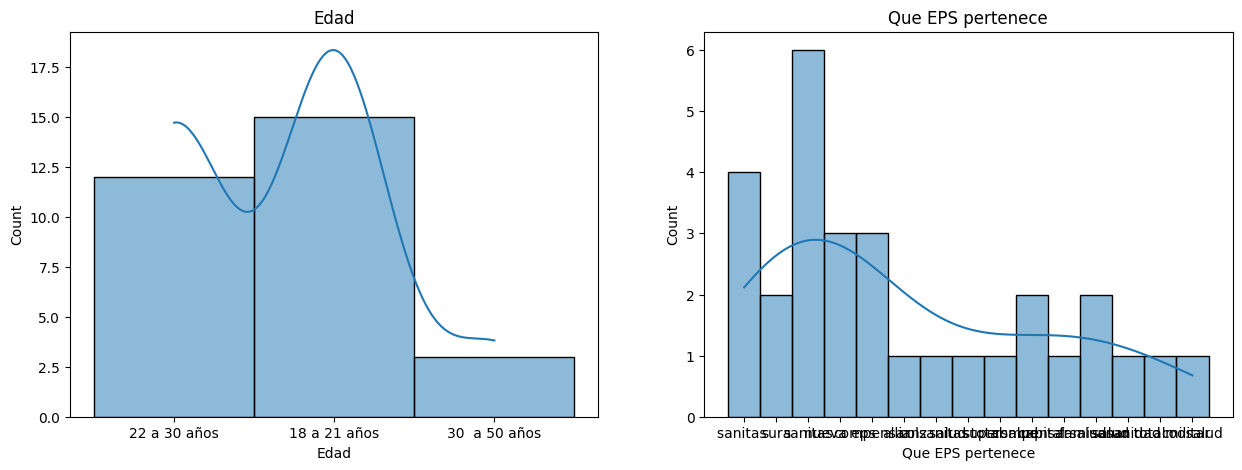

In [20]:
# Pero muchas veces es más útil graficar dichas variables

# Dibujar histogramas
col_num = ['Edad', 'Que EPS pertenece']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_num):
    if col == 'Edad':
        nbins = 10
    else:
        nbins = 50
    sns.histplot(x=col, data=data, ax=ax[i], bins=nbins, kde = True)
    ax[i].set_title(col)

In [21]:
# Veamos en detalle lo que ocurre con balance
data['Que EPS pertenece'].describe()

count          30
unique         15
top       sanitas
freq            6
Name: Que EPS pertenece, dtype: object

**Observaciones:**

- La mayor parte del grupo contactado tiene edades entre los 18 y los 21 años, con sesgo hacia los 30-50 años
- La mayor parte del grupo contactado (60%) es parte de la EPS Sanitas

##4.2 Análisis univariado

Teniendo claras algunas características generales de cada dato individual, la idea ahora es analizar si existe alguna relación entre las posibles variables predictoras y la variable a predecir.

Esto se conoce como análisis univariado.

⚠️⚠️⚠️ ADVERTENCIA ⚠️⚠️⚠️

Este análisis nos mostrará sólo una faceta de las posibles relaciones entre una cada variable predictora y la variable a predecir, y no es suficiente para extraer conclusiones definitivas.

In [24]:
# Comencemos representando la variable a predecir de forma binaria:
# 'si' = 1, 'no' = 0
diccionario = {'si':1, 'no':0}
binario = data['¿Qué aspectos mejoraría de los chatbot?'].map(diccionario)
data['¿Qué aspectos mejoraría de los chatbot?_bin'] = binario

# De esta forma resulta fácil calcular la tasa de conversión: el promedio'

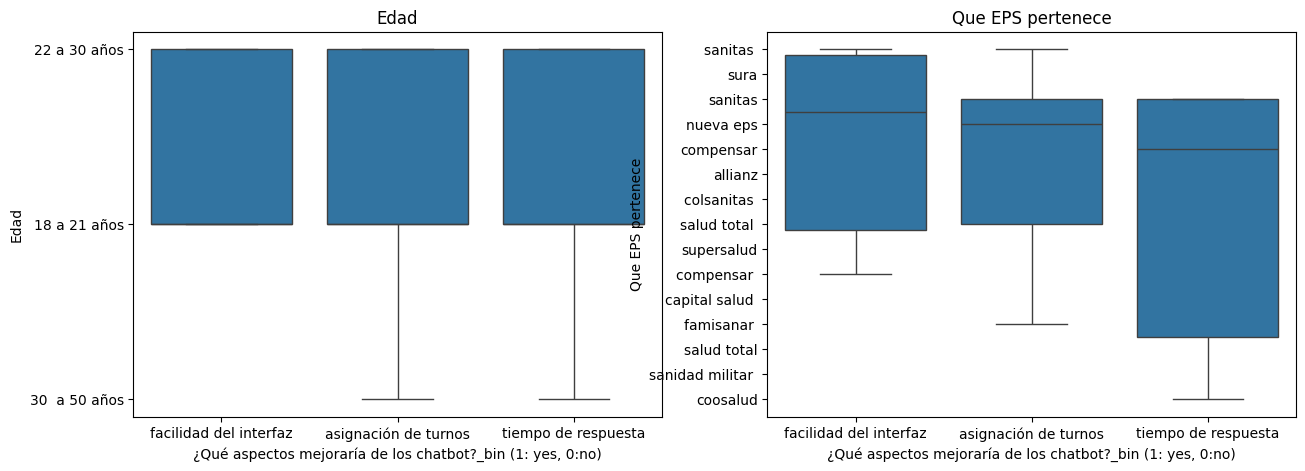

In [29]:
# Analizar la relación entre las variables numéricas y la variable a predecir (¿Qué aspectos mejoraría de los chatbot?)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
fig.subplots_adjust(hspace=.25)

for i, col in enumerate(col_num):
  bplt = sns.boxplot(x="¿Qué aspectos mejoraría de los chatbot?", y=col, data=data, ax=ax[i])
  ax[i].set_xlabel('¿Qué aspectos mejoraría de los chatbot?_bin (1: yes, 0:no)')
  ax[i].set_title(col)

**Observaciones:**
- Ni en 'age' ni en 'balance' se observan diferencias entre las personas que adquirieron o no el producto.
- Al parecer las variables numéricas no resultan en principio siendo variables predictivas.

Sin embargo estas variables numéricas se encuentran en un amplio rango.

Podemos calcular las tasas de conversión definiendo intervalos para estas variables numéricas y ver si podemos extraer información relevante de ese análisis:

# Conclusiones

- La variable "poutcome" seguida de las variables "job", "grupos_balance" y "grupos_edad" son las que tienen mayor impacto en la tasa de conversión.
- Con este análisis el perfil ideal de cliente sería:
    - Debe haber sido contactado previamente por el banco y debe haber adquirido previamente dicho producto (*poutcome == success*)
    - Perfil laboral (top-3): desempleado, estudiante, jubilado
    - Saldo en su cuenta bancaria: entre 16K y 20K (preferiblemente)
    - Edad: entre 18 y 25 años (preferiblemente)
    - Que NO cuente con crédito de consumo, crédito hipotecario o que no haya entrado en "default"


Es posible que la combinación de más de dos variables (análisis multivariado) arroje más luces sobre estos perfiles. Pero en este caso la interpretación de los resultados se dificulta a medida que analizamos de manera simultánea más y más variables.

En este punto el paso a seguir sería usar algún modelo de Machine Learning que permita encontrar esos patrones que no resultan fáciles de ver con este análisis exploratorio.